<a href="https://colab.research.google.com/github/Abotyt/k_HousePrice/blob/main/Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Prices - Advanced Regression Techniques

Description: \
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

Goal:\
For each Id in the test set, you must predict the value of the SalePrice variable.


Library:

In [ ]:
#install
#!pip install tensorflow_decision_forests


In [ ]:
import pandas as pd
import pickle
import sklearn.preprocessing
import sklearn.compose
import tensorflow as tf
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#import tensorflow_decision_forests as tfdf

In [ ]:
#print("TensorFlow v" + tf.__version__)
#print("TensorFlow Decision Forests v" + tfdf.__version__)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

## Data Analysis
### Read and Observe data

Evaluation: Root-Mean-Squared-Error (RMSE)

In [ ]:
train_data_original = pd.read_csv('/content/sample_data/train.csv')
train_data = train_data_original.copy()

In [ ]:
# some date contain 'None', a string data,but default na will consider None as NA.
train_data_na_false = pd.read_csv('/content/sample_data/train.csv', keep_default_na=False)

In [ ]:
#testing_data = pd.read_csv('/content/sample_data/test.csv')

In [ ]:
#sample = pd.read_csv('/content/sample_data/sample_submission.csv')

In [ ]:
train_data.dtypes[train_data.dtypes=='object']

,0
MSZoning,object
Street,object
Alley,object
LotShape,object
LandContour,object
Utilities,object
LotConfig,object
LandSlope,object
Neighborhood,object
Condition1,object


### Datatype

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Change data type:

* BsmtFullBath and BsmtHalfBath are represent the number of full or half in the basement, which range between 0 to 3. Rather than continuous data, it is a descrete data.\
\
solution: int64 -> obj

* BullBath and HalfBath\
\
solution: int64 -> obj

* BedroomAbvGr and KitchenAbvGr

* TotRmsAbvGrd and Fireplaces
* GarageYrBlt int64
* GarageCars

In [ ]:
train_data.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [ ]:
c = train_data.columns
count = 0
for each in c:
  if train_data[each].dtypes=='float64':
     count+=1
print(count)

3


In [ ]:
# check the value of a column
train_data['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40])

In [ ]:
train_data['MSSubClass'] = train_data['MSSubClass'].astype('object')

In [ ]:
train_data['BsmtFullBath'] = train_data['BsmtFullBath'].astype('object')
train_data['BsmtHalfBath'] = train_data['BsmtHalfBath'].astype('object')

In [ ]:
train_data['HalfBath'] = train_data['HalfBath'].astype('object')
train_data['FullBath'] = train_data['FullBath'].astype('object')

In [ ]:
train_data['BedroomAbvGr'] = train_data['BedroomAbvGr'].astype('object')
train_data['KitchenAbvGr'] = train_data['KitchenAbvGr'].astype('object')

In [ ]:
train_data['TotRmsAbvGrd'] = train_data['TotRmsAbvGrd'].astype('object')
train_data['Fireplaces'] = train_data['Fireplaces'].astype('object')

In [ ]:
train_data['GarageCars'] = train_data['GarageCars'].astype('object')

In [ ]:
train_data['MoSold'] = train_data['MoSold'].astype('object')
train_data['YrSold'] = train_data['YrSold'].astype('object')

## 2. Wrangle Anomaly

### Observation

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

###**Identify and address the nulls**::
first locate nulls by columns.
Compare the dataset with the data description to decide the strategy to clean the nulls.

In [ ]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
len(train_data)

1460

In [ ]:
# list the columns that contain missing value
#nulls = train_data.isna().any(axis = 0)
columns = list(train_data.columns)
null_cols = []
for one in columns:
  if train_data[one].isna().values.any() == True:
    null_cols.append(one)
    print(one)

LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


In [ ]:
train_data[null_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    588 non-null    object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   Electrical    1459 non-null   object 
 10  FireplaceQu   770 non-null    object 
 11  GarageType    1379 non-null   object 
 12  GarageYrBlt   1379 non-null   float64
 13  GarageFinish  1379 non-null   object 
 14  GarageQual    1379 non-null   object 
 15  GarageCond    1379 non-null   object 
 16  PoolQC        7 non-null      object 
 17  Fence         281 non-null    object 
 18  MiscFeature   54 non-null   

In [ ]:
# find unique values
train_data_na_false ['Utilities'].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [ ]:
len(train_data_na_false[train_data_na_false['MiscVal']!=0])

52

In [ ]:
train_data_na_false[train_data_na_false['MiscFeature']!='NA'][['MiscFeature','MiscVal']]

,MiscFeature,MiscVal
5,Shed,700
7,Shed,350
16,Shed,700
17,Shed,500
51,Shed,400
84,Shed,700
95,Shed,480
98,Shed,400
99,Shed,400
106,Shed,450


notes: features that label with “!!” need wrangling

* LotFrontage: Replace nulls with mean
* Alley: Na means no Alley. Only have a few data, delete the variable.
* MasVnrType: Replace nulls with None or Cblack
* MasVnrArea: Replace nulls with mean
* BsmtQual: Replace nulls with PO or NA
* BsmtCond: Futher investigation, nulls = EX or NA !!
* BsmtExposure: NA means no basement, keep as remain
* BsmtFinType1: NA means no basement, keep as remain
* BsmtFinType2: NA means no basement, keep as remain
* Electrical: need further investigation
* FireplaceQu: NA means no fireplace, keep as remain
* GarageType: NA means no garage, keep as remain
* GarageYrBlt:need further investigation
* GarageFinish: NA means no garage, keep as remain
* GarageQual: NA means no garage, keep as remain
* GarageCond: NA means no garage, keep as remain
* PoolQC: NA means no pool. Only have a few data, delete the variable.
* Fence: NA means no Fence. Only have a few data, delete the variable.

* MiscFeature: Only have a few data delete the variable
* MiscVal: Only have a few data delete the variable





**LotFrontage: Replace nulls with mean**


In [ ]:
train_data.dtypes['LotFrontage']

dtype('float64')

In [ ]:
train_data['LotFrontage'] = train_data['LotFrontage'].fillna(value=train_data['LotFrontage'].mean().round(0))
train_data['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  70.,  51.,  50.,  91.,
        72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,  74.,
       115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,  81.,
        95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,  77.,
        64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,  92.,
       134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,  67.,
        83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,  87.,
       116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,  38.,
       109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144., 114.,
       128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,  46.])

**MasVnrType: Replace nulls with None or Cblack**

PROBLEM - Read_csv function treat None as nulls which present as NA.\
SOLUTION - read file with defualt na in to fault. replace na into Cblack.


In [ ]:
#replace NA with Cblack
replace_null_MasVnrType = train_data_na_false['MasVnrType'].replace('NA','Cblack')
train_data['MasVnrType'] = replace_null_MasVnrType
train_data['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', 'Cblack'], dtype=object)

**MasVnrArea: missing value, use mean**

In [ ]:
train_data.dtypes['MasVnrArea']

dtype('float64')

In [ ]:
train_data['MasVnrArea'].unique()

array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 9.800e+01,
       2.750e+02, 1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02,
       1.530e+02, 6.400e+01, 3.120e+02, 1.600e+01, 

In [ ]:
train_data['MasVnrArea'] = train_data['MasVnrArea'].fillna(value=train_data['MasVnrArea'].mean())

**BsmtQual: Futher investigation, nulls = PO or NA(no basement)**

In [ ]:
train_data_na_false['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', 'NA', 'Fa'], dtype=object)

In [ ]:
train_data['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

**BsmtCond: Futher investigation, nulls = EX or NA(no basement)**

In [ ]:
train_data_na_false['BsmtCond'].unique()

array(['TA', 'Gd', 'NA', 'Fa', 'Po'], dtype=object)

In [ ]:
train_data['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

**BsmtExposure: Replace nulls with string 'NA'**

In [ ]:
train_data['BsmtExposure'] = train_data['BsmtExposure'].fillna('NA')
train_data['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', 'NA'], dtype=object)

**BsmtFinType1: Replace nulls with string 'NA'**

In [ ]:
train_data['BsmtFinType1'] = train_data['BsmtFinType1'].fillna('NA')
train_data['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'NA', 'LwQ'], dtype=object)

**BsmtFinType2: Replace nulls with string 'NA'**

In [ ]:
train_data['BsmtFinType2'] = train_data['BsmtFinType2'].fillna('NA')
train_data['BsmtFinType2'].unique()

array(['Unf', 'BLQ', 'NA', 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

**Electrical: need further investigation**

In [ ]:
train_data['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

**FireplaceQu: NA means no fireplace, keep as remain**

In [ ]:
train_data['FireplaceQu'] = train_data['FireplaceQu'].fillna('NA')
train_data['FireplaceQu'].unique()

array(['NA', 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

**GarageType: Replace nulls with string 'NA'**

In [ ]:
train_data['GarageType'] = train_data['GarageType'].fillna('NA')
train_data['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'NA', 'Basment',
       '2Types'], dtype=object)

**GarageYrBlt: need further investigation**

In [ ]:
train_data_na_false['GarageYrBlt'].unique()

array(['2003', '1976', '2001', '1998', '2000', '1993', '2004', '1973',
       '1931', '1939', '1965', '2005', '1962', '2006', '1960', '1991',
       '1970', '1967', '1958', '1930', '2002', '1968', '2007', '2008',
       '1957', '1920', '1966', '1959', '1995', '1954', '1953', 'NA',
       '1983', '1977', '1997', '1985', '1963', '1981', '1964', '1999',
       '1935', '1990', '1945', '1987', '1989', '1915', '1956', '1948',
       '1974', '2009', '1950', '1961', '1921', '1900', '1979', '1951',
       '1969', '1936', '1975', '1971', '1923', '1984', '1926', '1955',
       '1986', '1988', '1916', '1932', '1972', '1918', '1980', '1924',
       '1996', '1940', '1949', '1994', '1910', '1978', '1982', '1992',
       '1925', '1941', '2010', '1927', '1947', '1937', '1942', '1938',
       '1952', '1928', '1922', '1934', '1906', '1914', '1946', '1908',
       '1929', '1933'], dtype=object)

Nulls only appear when there is no garage at a property.We will replace the 'NA' as 0.

In [ ]:
train_data_na_false[train_data_na_false['GarageYrBlt'] == 'NA'][['GarageType', 'GarageFinish']].value_counts()

,,count
GarageType,GarageFinish,
NA,NA,81


In [ ]:
train_data['GarageYrBlt'] = train_data['GarageYrBlt'].fillna(0)
train_data['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,    0., 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [ ]:
#train_data['GarageYrBlt'] = train_data['GarageYrBlt'].astype('int64')

**GarageFinish: NA means no garage, keep as remain**

In [ ]:
train_data['GarageFinish'] = train_data['GarageFinish'].fillna('NA')
train_data['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', 'NA'], dtype=object)

**GarageQual: NA means no garage, keep as remain**

In [ ]:
train_data['GarageQual'] = train_data['GarageQual'].fillna('NA')
train_data['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', 'NA', 'Ex', 'Po'], dtype=object)

**GarageCond: NA means no garage, keep as remain**

In [ ]:
train_data['GarageCond'] = train_data['GarageCond'].fillna('NA')
train_data['GarageCond'].unique()

array(['TA', 'Fa', 'NA', 'Gd', 'Po', 'Ex'], dtype=object)

** PoolQC and PoolArea: only 7 property has pool not much of sample to observe.

solution:drop PoolQC and PoolArea

### **Anomaly data**

In [ ]:
len(train_data[train_data['Fireplaces']==0]['FireplaceQu'])

690

MSSubClass

In [ ]:
fir_floor_type = [20,30,40,120]

In [ ]:
train_data['MSSubClass'].unique()

array([60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80, 160, 75, 180, 40],
      dtype=object)

MSSubClass = 20
1. Wrong Year Built
2. House Style is not '1Story'


observe

In [ ]:
train_data[(train_data['YearBuilt']>1945)&(train_data['2ndFlrSF']==0)&(train_data['MSSubClass'].isin([20]))&(train_data['HouseStyle']=='1Story')][['MSSubClass','HouseStyle','1stFlrSF','2ndFlrSF','GrLivArea','YearBuilt']]

,MSSubClass,HouseStyle,1stFlrSF,2ndFlrSF,GrLivArea,YearBuilt
1,20,1Story,1262,0,1262,1976
6,20,1Story,1694,0,1694,2004
10,20,1Story,1040,0,1040,1965
12,20,1Story,912,0,912,1962
13,20,1Story,1494,0,1494,2006
...,...,...,...,...,...,...
1453,20,1Story,1140,0,1140,2006
1454,20,1Story,1221,0,1221,2004
1456,20,1Story,2073,0,2073,1978
1458,20,1Story,1078,0,1078,1950


1. Wrong Year Built

In [ ]:
train_data['MSSubClass'][1332] = 30
train_data['MSSubClass'][1332]

<ipython-input-52-84d1fe4b5500>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train_data['MSSubClass'][1332] = 30
<ipython-input-52-84d1fe4b5500>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

30

2. HouseStyle is not 1Story

In [ ]:
train_data['HouseStyle'][944] = '1Story'
train_data['HouseStyle'].iloc[944]

<ipython-input-53-c1bfd7c72c97>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train_data['HouseStyle'][944] = '1Story'
<ipython-input-53-c1bfd7c72c97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

'1Story'

MSSubClass = 30


In [ ]:
train_data[(train_data['YearBuilt']<=1945)&(train_data['2ndFlrSF']==0)&(train_data['MSSubClass'].isin([30]))&(train_data['HouseStyle']!='1Story')][['MSSubClass','HouseStyle','1stFlrSF','2ndFlrSF','GrLivArea','YearBuilt']]

,MSSubClass,HouseStyle,1stFlrSF,2ndFlrSF,GrLivArea,YearBuilt
1443,30,1.5Unf,952,0,952,1916


Index 729:
GrLivArea is not the same as 1stFlrSF. In other words, 2ndFlrSF should not be 0 and MSSubClass should not be 30. HouseStyle is correct == 1.5Fin.

Solution:
1. Change 30 in MSSubClass to 50
2. GrLivArea - 1stFlrSf == 2ndFlrSF

In [ ]:
train_data['MSSubClass'][729] = 50
train_data['MSSubClass'].iloc[729]

<ipython-input-61-da0893ec02ab>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train_data['MSSubClass'][729] = 50
<ipython-input-61-da0893ec02ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

50

In [ ]:
train_data['2ndFlrSF'].iloc[729] = train_data['GrLivArea'][729]-train_data['1stFlrSF'][729]

<ipython-input-66-8acf98a72744>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train_data['2ndFlrSF'].iloc[729] = train_data['GrLivArea'][729]-train_data['1stFlrSF'][729]
<ipython-input-66-8acf98a72744>:1: SettingWithCopyWarning: 
A value 

Index 1443: HouseStyle should be 1Story

In [ ]:
train_data['HouseStyle'][1443] = '1Story'
train_data['HouseStyle'].iloc[1443]

<ipython-input-71-56413c1f31ca>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train_data['HouseStyle'][1443] = '1Story'
<ipython-input-71-56413c1f31ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

'1Story'

MSSubClass = 40


In [ ]:
train_data[(train_data['2ndFlrSF']==0)&(train_data['MSSubClass'].isin([40]))&(train_data['HouseStyle']=='1Story')][['MSSubClass','HouseStyle','1stFlrSF','2ndFlrSF','GrLivArea','YearBuilt']]

,MSSubClass,HouseStyle,1stFlrSF,2ndFlrSF,GrLivArea,YearBuilt
589,40,1Story,779,0,935,1930
873,40,1Story,1036,0,1268,1949


GrlivArea is not == 1stFlrSf
Solution replace GrLiveArea value equal to 1stFlrSF

In [ ]:
train_data['GrLivArea'][[589,873]] = train_data['1stFlrSF'][[589,873]]
train_data['GrLivArea'][[589,873]]

<ipython-input-89-98019e803efa>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train_data['GrLivArea'][[589,873]] = train_data['1stFlrSF'][[589,873]]
<ipython-input-89-98019e803efa>:1: SettingWithCopyWarning: 
A value is trying to be set o

,GrLivArea
589,779
873,1036


MSSubClass = 45
1. 2ndFlrSf == 0

In [ ]:
train_data[(train_data['2ndFlrSF']!=0)&(train_data['MSSubClass'].isin([50]))&(train_data['HouseStyle']!='1.5Fin')][['MSSubClass','HouseStyle','1stFlrSF','2ndFlrSF','GrLivArea','YearBuilt']]

,MSSubClass,HouseStyle,1stFlrSF,2ndFlrSF,GrLivArea,YearBuilt
74,50,2Story,840,765,1605,1915
79,50,2Story,682,548,1230,1910
1448,50,2Story,796,550,1346,1910


In [ ]:
train_data[(train_data['YearBuilt']<=1945)&(train_data['2ndFlrSF']==0)&(~train_data['MSSubClass'].isin([20,120,40]))&(train_data['HouseStyle']=='1Story')&(train_data['GrLivArea']-train_data['1stFlrSF']!=0)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [ ]:
#1-STORY 1946 & NEWER ALL STYLES
update_index = train_data[(train_data['YearBuilt']>=1946)&(train_data['2ndFlrSF']==0)&(~train_data['MSSubClass'].isin([20,120,40]))&(train_data['HouseStyle']=='1Story')]['MSSubClass'].index
update_index

Index([], dtype='int64')

In [ ]:
train_data.loc[update_index,'MSSubClass']=20

In [ ]:
#1-STORY W/FINISHED ATTIC ALL AGES (second floor update)
train_data[train_data['MSSubClass']==40][['MSSubClass','HouseStyle','1stFlrSF','2ndFlrSF','GrLivArea']]

,MSSubClass,HouseStyle,1stFlrSF,2ndFlrSF,GrLivArea
164,40,1Story,1149,467,1616
589,40,1Story,779,156,935
873,40,1Story,1036,232,1268
1270,40,1Story,1332,192,1524


In [ ]:
update_index = train_data[train_data['MSSubClass']==40]['2ndFlrSF'].index
update_index

Index([164, 589, 873, 1270], dtype='int64')

In [ ]:
SecondFlr_SF = train_data['GrLivArea']-train_data['1stFlrSF']
SecondFlr_SF[update_index]

,0
164,467
589,156
873,232
1270,192


In [ ]:
train_data.loc[update_index,'2ndFlrSF']=SecondFlr_SF[update_index]

In [ ]:
#  45	1-1/2 STORY - UNFINISHED ALL AGES
train_data[train_data['MSSubClass']==45][['YearBuilt','MSSubClass','HouseStyle','1stFlrSF','2ndFlrSF','GrLivArea']]

,YearBuilt,MSSubClass,HouseStyle,1stFlrSF,2ndFlrSF,GrLivArea
15,1929,45,1.5Unf,854,0,854
21,1930,45,1.5Unf,1108,0,1108
127,1930,45,1.5Unf,840,0,840
163,1956,45,1.5Unf,882,0,882
325,1941,45,1.5Unf,803,0,803
383,1928,45,1.5Unf,784,0,784
437,1926,45,1.5Unf,904,0,904
514,1926,45,1.5Unf,789,0,789
555,1922,45,1.5Unf,1048,0,1048
617,1954,45,1.5Unf,832,0,832


In [ ]:
train_data[train_data['MSSubClass']==50][['YearBuilt','MSSubClass','HouseStyle','1stFlrSF','2ndFlrSF','GrLivArea']]

,YearBuilt,MSSubClass,HouseStyle,1stFlrSF,2ndFlrSF,GrLivArea
5,1993,50,1.5Fin,796,566,1362
8,1931,50,1.5Fin,1022,752,1774
46,2003,50,1.5Fin,1518,631,2149
51,1934,50,1.5Fin,816,0,1176
69,1953,50,1.5Fin,1304,983,2287
...,...,...,...,...,...,...
1404,1915,50,1.5Fin,694,520,1214
1411,1950,50,1.5Fin,1112,556,1668
1414,1923,50,1.5Fin,1053,795,1848
1427,1945,50,1.5Fin,1048,510,1558


In [ ]:
train_data[train_data['HouseStyle']=='1.5Unf'][['YearBuilt','MSSubClass','HouseStyle','1stFlrSF','2ndFlrSF','GrLivArea']]

,YearBuilt,MSSubClass,HouseStyle,1stFlrSF,2ndFlrSF,GrLivArea
9,1939,190,1.5Unf,1077,0,1077
15,1929,45,1.5Unf,854,0,854
21,1930,45,1.5Unf,1108,0,1108
127,1930,45,1.5Unf,840,0,840
163,1956,45,1.5Unf,882,0,882
325,1941,45,1.5Unf,803,0,803
383,1928,45,1.5Unf,784,0,784
437,1926,45,1.5Unf,904,0,904
514,1926,45,1.5Unf,789,0,789
555,1922,45,1.5Unf,1048,0,1048


In [ ]:
train_data[]

1stFlrSF1, 2ndFlrSF1, Gr Liv Area

In [ ]:
train_data['MSSubClass'].unique()

array([60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80, 160, 75, 180, 40],
      dtype=object)

In [ ]:
fir_floor_type = [20,30,40,120]


In [ ]:
train_data[train_data['MSSubClass'].isin(fir_floor_type)&train_data['2ndFlrSF']!=0][['1stFlrSF','2ndFlrSF','GrLivArea']]

,1stFlrSF,2ndFlrSF,GrLivArea
164,1149,467,1616


In [ ]:
train_data[(train_data['MSSubClass']==50)][['1stFlrSF','2ndFlrSF','GrLivArea']]

,1stFlrSF,2ndFlrSF,GrLivArea
5,796,566,1362
8,1022,752,1774
46,1518,631,2149
51,816,0,1176
69,1304,983,2287
...,...,...,...
1404,694,520,1214
1411,1112,556,1668
1414,1053,795,1848
1427,1048,510,1558


In [ ]:
train_data[train_data['1stFlrSF']==1149][['MSSubClass','1stFlrSF','2ndFlrSF','GrLivArea']]

,MSSubClass,1stFlrSF,2ndFlrSF,GrLivArea
164,40,1149,467,1616
983,60,1149,1141,2290


In [ ]:
train_data[train_data['2ndFlrSF']==467]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
164,165,40,RM,40.0,5400,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,152000
504,505,160,RL,24.0,2308,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,147000


In [ ]:
1stflrsf ==1149
2nd ==467

fistfloor

In [ ]:
has_second_floor = train_data[(train_data['2ndFlrSF'] == 0) & (train_data['MSSubClass'].isin(fir_floor_type)==False)]['MSSubClass']
has_second_floor

,MSSubClass
9,190
15,45
17,90
21,45
39,90
...,...
1406,85
1412,90
1445,85
1449,180


In [ ]:
has_second_floor[has_second_floor['GrLivArea']-has_second_floor['1stFlrSF']!=0]['2ndFlrSF']

,2ndFlrSF
51,0
88,0
125,0
170,0
263,0
406,0
1009,0


second floor

GrLivArea should equal to the total square feet of first and second floor.

In [ ]:
one_and_two = train_data['1stFlrSF'] + train_data['2ndFlrSF']

In [ ]:
train_data[(one_and_two-train_data['GrLivArea']!=0)&train_data['MSSubClass'] is in [] ]['MSSubClass']

,MSSubClass
51,50
88,50
125,190
170,50
185,75
187,50
197,75
198,75
263,50
267,75


In [ ]:
train_data[train_data['OverallCond']==5]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,New,Partial,287090
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000


In [ ]:
train_data['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

### **duplication**

In [ ]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.041096,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,1868.739726,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,421.610009,42.300571,22.024031,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,...,453.697295,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,1958.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,730.500000,50.000000,70.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,1977.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,2001.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,2010.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


In [ ]:
train_data.duplicated().any()

False

In [ ]:
train_data[train_data['1stFlrSF'] == train_data['TotalBsmtSF']]['BldgType'].unique()

array(['1Fam', 'TwnhsE', '2fmCon', 'Duplex', 'Twnhs'], dtype=object)

### **Variables Selection**

In [ ]:
# no Average/Typical pool
train_data.drop('PoolQC', axis=1, inplace=True)
train_data.drop('PoolArea', axis=1, inplace=True)
train_data.drop('Alley', axis=1, inplace=True)
train_data.drop('Fence', axis=1, inplace=True)
train_data.drop('MiscVal', axis=1, inplace=True)
train_data.drop('MiscFeature', axis=1, inplace=True)
train_data.drop('CentralAir', axis=1, inplace=True)

### **Outlier Removal**

In [ ]:
train_target = train_data['SalePrice'].copy()

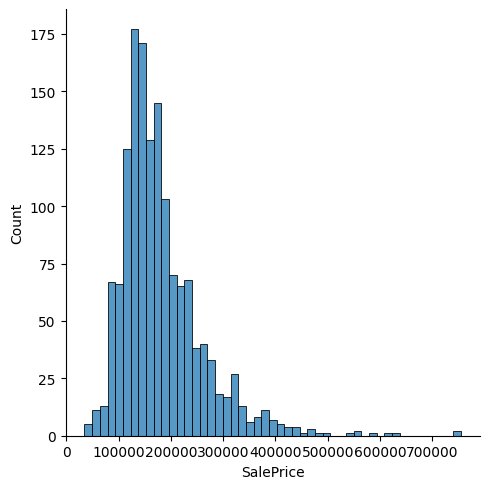

In [ ]:
#original distripution
sns.displot(train_target)

In [ ]:
#drop the 2 data point that are further away from the mean
#drop_index = train_target[train_target>700000].index
#train_target.drop(drop_index, inplace=True)


<Axes: ylabel='SalePrice'>

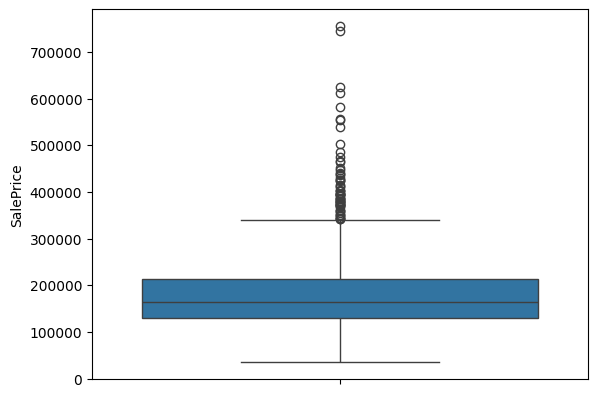

In [ ]:
sns.boxplot(train_target)

In [ ]:
Q3 = train_target.quantile(0.75)
Q3

214000.0

In [ ]:
Q1 = train_target.quantile(0.25)

In [ ]:
IQR = Q3-Q1
UpperBound = Q3+1.5*IQR

In [ ]:
UpperBound

340037.5

In [ ]:
outliers_index = train_target[train_target>UpperBound].index
outliers_index

Index([  11,   53,   58,  112,  151,  161,  178,  185,  224,  231,  278,  309,
        313,  320,  321,  336,  349,  378,  389,  440,  473,  477,  481,  496,
        515,  527,  585,  591,  608,  642,  644,  654,  661,  664,  678,  688,
        691,  702,  718,  769,  774,  798,  803,  825,  877,  898,  987,  990,
       1046, 1142, 1169, 1181, 1182, 1228, 1243, 1267, 1268, 1353, 1373, 1388,
       1437],
      dtype='int64')

In [ ]:
train_target.drop(outliers_index, inplace=True)

In [ ]:
#train_target[train_target>UpperBound] = np.median(train_target)

In [ ]:
len(train_target)

1399

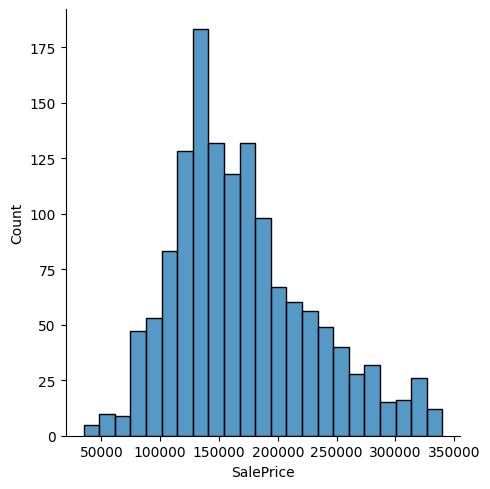

In [ ]:
sns.displot(train_target)

##Data Analysis

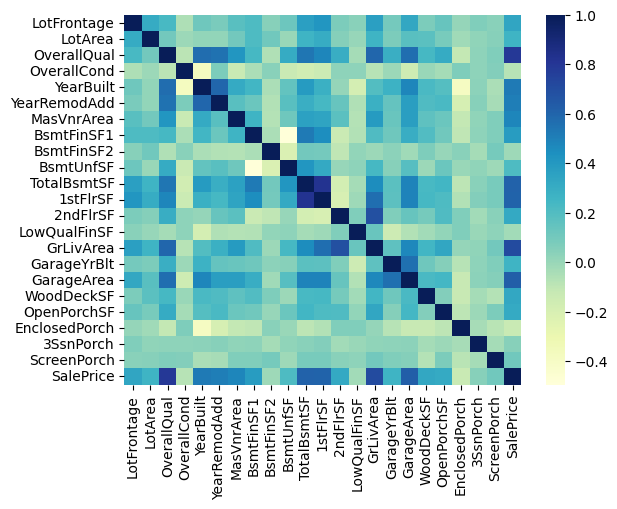

In [ ]:
train_data_int = train_data.iloc[:,1:].select_dtypes(include=['int64','float64'])
# compute correlation
corr = train_data_int.corr()
# Generate a mask for the upper triangle

dataplot = sns.heatmap(corr, cmap="YlGnBu")

# Displaying heatmap
plt.show()

In [ ]:
corr[corr>0.5]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,SalePrice
LotFrontage,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotArea,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallQual,NaN,NaN,1.000000,NaN,0.572323,0.550684,NaN,NaN,NaN,NaN,...,NaN,0.593007,NaN,0.562022,NaN,NaN,NaN,NaN,NaN,0.790982
OverallCond,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearBuilt,NaN,NaN,0.572323,NaN,1.000000,0.592855,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.522897
YearRemodAdd,NaN,NaN,0.550684,NaN,0.592855,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.507101
MasVnrArea,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtUnfSF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
##SalePrice=OverallQual, YearBuilt, YearRemodAdd, TotalBsmtSF, 1stFlrSF, GrLivArea, GarageArea
##GrLivArea=2ndFlrSF
##1stFlrSf=TotalBsmtSF


## Normalisation and standardisation

## Parameter Tunning

# Export data


In [ ]:
train_data.to_csv(r'wrangled_train.csv')